# Plotting behavorial data generated by OpenSesame

In the data wrangling tutorial we covered how to import and manipulate a dataframe. We also saw some ways to get an idea how your data looks like by grouping the data. In this tutorial we will go a step further by also visualizing the data. Therefore, we will use python's most widely used visualization package: [matplotlib](https://matplotlib.org/). Let's first load the data. We will use the same data as in the data wrangling tutorial.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# disable chained assignments
pd.options.mode.chained_assignment = None

subj1 = pd.read_csv("data/subject-3.csv", sep=",")
subj2 = pd.read_csv("data/subject-4.csv", sep=",")

df = pd.concat([subj1, subj2], ignore_index=True)

include_columns = ['subject_nr', 'block', 'session', 'congruency_transition_type', 'congruency_type',
                   'correct', 'response_time', 'task_transition_type', 'task_type', 'cue_color']

df_trim = df[include_columns]
df_trim['subject_nr'] = df_trim['subject_nr'].astype('category')
df_trim['correct'] = df_trim['correct'].astype('category')

df_trim_blocks = df_trim[df_trim['block'] < 11]

df_trim_blocks['subject_nr'] = df_trim_blocks['subject_nr'].replace(3, 1)
df_trim_blocks['subject_nr'] = df_trim_blocks['subject_nr'].replace(4, 2)

df_trim_blocks

ModuleNotFoundError: No module named 'seaborn'

First thing to check is how the response time distribution looks like. Many statistical tests assume a normal distribution, but is that the case in our response time distribution as well? Using matplotlib.pyplot we can easily make a histogram plot by specifying the column that should be plotted:

In [2]:
plt.hist(df_trim_blocks['response_time'])
plt.show()

NameError: name 'df_trim_blocks' is not defined

That's a good start. However, we are still missing lots of things in this plot. There are no labels for the x- and y-axis, there is no title for the plot, I think we need a few more bins, the graph could be a bit wider, and I am also not happy about the background colour. This is where the real power of matplotlib shows itself: you can customize virtually anything you want in these plots. L

NameError: name 'df_trim_blocks' is not defined

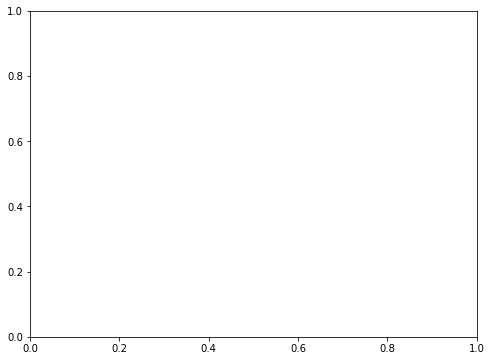

In [3]:
plt.figure(figsize=(8,6), # Change size to width,height in inches
           facecolor='grey', # Change background colour to grey
           frameon=False) # Remove background behind the bars
plt.grid(visible=None) # Remove the background grid lines

plt.hist(df_trim_blocks['response_time'],
         bins=30) # Bins defines the amount of bins you want to plot

plt.xlabel("RT", size=14) # label on the x-axis, size defines font size
plt.ylabel("Count", size=14) # label on the y-axis, size defines font size
plt.title("Response time distribution") # title of the plot
plt.show()

We can also make overlays to compare two distributions. Let's for example see how the distribution of correct versus incorrect trials look like.

NameError: name 'df_trim_blocks' is not defined

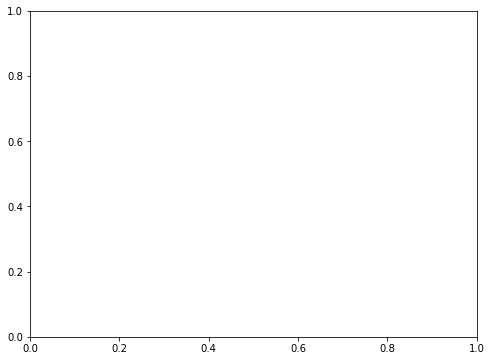

In [4]:
plt.figure(figsize=(8,6), # Change size to width,height in inches
           facecolor='grey', # Change background colour to grey
           frameon=False) # Remove background behind the bars
plt.grid(visible=None) # Remove the background grid lines

# Here we make two dataframes, one with only correct trials and another with only incorrect trials
correct_trials = df_trim_blocks[df_trim_blocks['correct'] == 1]
incorrect_trials = df_trim_blocks[df_trim_blocks['correct'] == 0]

# Then we make two histograms. Matplotlib will automatically place items you make in the same figure.
plt.hist(correct_trials['response_time'],
         bins=20,
         alpha=0.5, # This defines opacity of the bars
         color='green',
         label="correct trials") # This defines the label that the bar gets, for the legend

plt.hist(incorrect_trials['response_time'],
         bins=20,
         alpha=0.5,
         color='red',
         label="incorrect trials")

plt.xlabel("RT", size=14)
plt.ylabel("Count", size=14)
plt.title("Correct vs incorrect response time distributions")
plt.legend(loc='upper right') # This tells matplotlib to create a legend, and place it on the upper right field of the plot
plt.show()

In [5]:
df_block = df_trim_blocks.groupby('block').mean()

plt.plot(df_block)

NameError: name 'df_trim_blocks' is not defined

In [6]:

#df.head()

#df['acc']
#df.acc

#df.iloc[1]

#print(df['congruency'])

#df.shape

#dfg = df.groupby('subject_nr')
#dfg.mean()

#df.groupby('subject_nr').agg([np.sum, np.mean, np.std])


df['rt_zscore'] = df.groupby(['subject_nr','congruency'])['response_time'].transform(lambda x: (x-x.mean())/x.std())

print(df)


NameError: name 'df' is not defined

In [7]:
plt.figure(figsize=(8,6));
plt.hist(df.query("congruency == 'inc' & rt_zscore <= 3").response_time, bins=100, alpha=0.5, label="data1");
plt.hist(df.query("congruency == 'inc' & rt_zscore > 3").response_time, bins=100, alpha=0.5, label="data2");

NameError: name 'df' is not defined

<Figure size 576x432 with 0 Axes>

In [8]:
import seaborn as sns

df['is_outlier'] = df['rt_zscore'] > 3

sns.set_theme(style="darkgrid")
sns.displot(
    df.query("subject_nr != 0"), x="response_time", col="congruency", row="subject_nr",
    binwidth=10, height=3, facet_kws=dict(margin_titles=True), hue = "is_outlier",
)

ModuleNotFoundError: No module named 'seaborn'

In [9]:
df

NameError: name 'df' is not defined

In [10]:
df_sum = df.query("rt_zscore <= 3").groupby(['subject_nr','congruency'])['response_time'].mean()

NameError: name 'df' is not defined

In [11]:
df_sum

NameError: name 'df_sum' is not defined